In [177]:
import pandas as pd

df = pd.read_csv(r"C:\Users\andre\OneDrive - Universidad Complutense de Madrid (UCM)\Escritorio\UNIVERSIDAD\2º\2º Cuatrimestre\PD1\fighters_final_limpio.csv")

df

,unnamed:_0,name,striking_accuracy(%),efectividad_de_derribo_(%),sig_str_landed,sig_str_attempted,takedowns_landed,takedowns_attempted,sig_str_landed_per_min,sig_str_absorbed_per_min,knockdown_per_15min(avg),promedio_de_sumisión_por_15m,sig_str_defense(%),takedown_defense(%),time_fight(avg),sig_str_standing,sig_str_standing(%),sig_str_clinch,sig_str_clinch(%),sig_str_ground,porcentaje_suelo,sig_str_to_head,sig_str_to_head(%),sig_str_to_legs,sig_str_to_legs(%),wins_by_ko/tko,wins_by_ko/tko(%),wins_by_decision,wins_by_decision(%),wins_by_submission,wins_by_submission(%),status,place_of_birth,fighting_style,age,height,weight,octagon_debut,reach,leg_reach,division,imagen,Wins,Losses,Draws
0,0,JUAN ADAMS,0.56,0.56,234.0,420.0,2.00,3.0,7.09,4.06,0.91,0.00,0.35,0.57,396,112,0.48,52,0.22,70,30%,192,0.82,10,0.04,5,1.00,0,0.00,0,0.00,NOT FIGHTING,"HOUSTON, UNITED STATES",MMA,31.0,77.0,266.0,"DEC. 15, 2018",80.0,42.5,Heavyweight Division,https://dmxg5wxfqgb4u.cloudfront.net/styles/at...,5,3,0
1,1,ANTHONY ADAMS,0.42,0.42,95.0,227.0,2.94,7.0,3.17,5.93,0.00,0.00,0.44,NaN,900,84,0.88,11,0.12,0,0%,37,0.39,29,0.31,0,0.00,0,0.00,0,0.00,NOT FIGHTING,"PHILADELPHIA, UNITED STATES",NaN,35.0,73.0,184.5,"FEB. 19, 2025",76.5,43.0,Middleweight Division,https://dmxg5wxfqgb4u.cloudfront.net/styles/at...,8,2,0
2,2,ZARRUKH ADASHEV,0.40,0.40,115.0,285.0,2.00,5.0,3.65,3.04,0.00,0.48,0.65,1.00,473,107,0.93,6,0.05,2,2%,76,0.66,23,0.20,2,0.50,2,0.50,0,0.00,NOT FIGHTING,"SAMARKAND, UZBEKISTAN",MMA,30.0,65.0,125.5,"JUN. 13, 2020",65.0,35.0,Flyweight Division,https://dmxg5wxfqgb4u.cloudfront.net/styles/at...,4,4,0
3,3,ISRAEL ADESANYA,0.48,0.48,1271.0,2639.0,4.32,9.0,4.02,3.20,0.05,0.14,0.56,0.77,1055,1170,0.92,64,0.05,37,3%,623,0.49,382,0.30,16,0.67,8,0.33,0,0.00,ACTIVE,"LAGOS, NIGERIA",FREESTYLE,35.0,76.0,185.0,"FEB. 11, 2018",80.0,44.5,Middleweight Division,https://dmxg5wxfqgb4u.cloudfront.net/styles/at...,24,5,0
4,4,NICK AGALLAR,0.12,0.12,5.0,43.0,0.24,2.0,0.69,4.56,0.00,0.00,0.42,NaN,434,4,0.80,1,0.20,0,0%,2,0.40,3,0.60,0,0.00,0,0.00,0,0.00,NOT FIGHTING,"RACINE, UNITED STATES",NaN,44.0,67.0,155.0,"NOV. 21, 2003",NaN,NaN,Lightweight Division,NaN,12,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2769,2769,ZHALGAS ZHUMAGULOV,0.43,0.43,425.0,987.0,3.00,36.0,5.24,5.86,1.30,0.19,0.52,0.75,695,404,0.95,19,0.04,2,0%,155,0.36,133,0.31,7,0.50,6,0.43,1,0.07,NOT FIGHTING,KAZAKHSTAN,FREESTYLE,34.0,64.0,125.5,"JUL. 11, 2020",66.5,36.0,Flyweight Division,https://dmxg5wxfqgb4u.cloudfront.net/styles/at...,14,9,0
2770,2770,FARÈS ZIAM,0.52,0.52,342.0,661.0,16.64,32.0,2.85,1.62,1.62,0.25,0.65,0.70,801,241,0.70,42,0.12,59,17%,223,0.65,52,0.15,6,0.35,7,0.41,4,0.24,ACTIVE,"VÉNISSIEUX, AUVERGNE-RHÔNE-ALPES, FRANCE",KICKBOXER,27.0,73.0,156.0,"SEP. 7, 2019",75.0,42.0,Lightweight Division,https://dmxg5wxfqgb4u.cloudfront.net/styles/at...,17,4,0
2771,2771,JAMES ZIKIC,0.44,0.44,29.0,66.0,0.44,1.0,1.93,3.20,0.00,1.00,0.44,0.74,900,8,0.28,11,0.38,10,34%,20,0.69,1,0.03,0,0.00,0,0.00,0,0.00,NOT FIGHTING,"WATFORD, UNITED KINGDOM",NaN,46.0,74.0,202.0,"JUL. 13, 2002",NaN,NaN,Light Heavyweight Division,NaN,16,3,0
2772,2772,CAT ZINGANO,0.61,0.61,181.0,295.0,13.00,20.0,2.57,1.63,2.77,0.85,0.47,0.43,604,66,0.36,44,0.24,71,39%,107,0.59,28,0.15,5,0.50,2,0.20,3,0.30,NOT FIGHTING,"WINONA, UNITED STATES",NaN,40.0,66.0,144.0,"APR. 14, 2013",68.0,38.0,Women's Featherweight Division,https://dmxg5wxfqgb4u.cloudfront.net/styles/at...,10,4,0


# Análisis de los datos

In [178]:
df.isnull().sum()

unnamed:_0                         0
name                               0
striking_accuracy(%)              87
efectividad_de_derribo_(%)       383
sig_str_landed                    87
sig_str_attempted                 87
takedowns_landed                 383
takedowns_attempted              383
sig_str_landed_per_min            79
sig_str_absorbed_per_min          79
knockdown_per_15min(avg)          79
promedio_de_sumisión_por_15m      79
sig_str_defense(%)                92
takedown_defense(%)              523
time_fight(avg)                    0
sig_str_standing                   0
sig_str_standing(%)                0
sig_str_clinch                     0
sig_str_clinch(%)                  0
sig_str_ground                     0
porcentaje_suelo                   0
sig_str_to_head                    0
sig_str_to_head(%)                 0
sig_str_to_legs                    0
sig_str_to_legs(%)                 0
wins_by_ko/tko                     0
wins_by_ko/tko(%)                  0
w

In [179]:
df.shape

(2774, 45)

# Limpieza de los datos

In [180]:
#Eliminamos alos peleadores con menos de tres peleas, ya que sus datos no son fiables
df_p = pd.read_csv(r"C:\Users\andre\OneDrive - Universidad Complutense de Madrid (UCM)\Escritorio\UNIVERSIDAD\2º\2º Cuatrimestre\PD1\df_limpio.csv")
df_p

peleadores = list(df_p["Peleador_A"]) + list(df_p["Peleador_B"])
peleadores_counts = pd.Series(peleadores).value_counts()
filtro = peleadores_counts >= 3
peleadores = peleadores_counts[filtro].index

peleadores = [peleador.upper() for peleador in peleadores]

df = df[df["name"].isin(peleadores)]

In [181]:
#Eliminar peleadores sin victorias ni derrotas
df = df[(df["Wins"] != 0) & (df["Losses"] != 0)]

In [182]:
#Si una fila tiene menos de 80% de valores no nulos, será eliminada
umbral = int(df.shape[1] * 0.8)
df = df.dropna(thresh=umbral)
df.shape
df.isnull().sum()

unnamed:_0                        0
name                              0
striking_accuracy(%)              0
efectividad_de_derribo_(%)       46
sig_str_landed                    0
sig_str_attempted                 0
takedowns_landed                 46
takedowns_attempted              46
sig_str_landed_per_min            0
sig_str_absorbed_per_min          0
knockdown_per_15min(avg)          0
promedio_de_sumisión_por_15m      0
sig_str_defense(%)                0
takedown_defense(%)              60
time_fight(avg)                   0
sig_str_standing                  0
sig_str_standing(%)               0
sig_str_clinch                    0
sig_str_clinch(%)                 0
sig_str_ground                    0
porcentaje_suelo                  0
sig_str_to_head                   0
sig_str_to_head(%)                0
sig_str_to_legs                   0
sig_str_to_legs(%)                0
wins_by_ko/tko                    0
wins_by_ko/tko(%)                 0
wins_by_decision            

In [183]:
df.describe()

,unnamed:_0,striking_accuracy(%),efectividad_de_derribo_(%),sig_str_landed,sig_str_attempted,takedowns_landed,takedowns_attempted,sig_str_landed_per_min,sig_str_absorbed_per_min,knockdown_per_15min(avg),promedio_de_sumisión_por_15m,sig_str_defense(%),takedown_defense(%),time_fight(avg),sig_str_standing,sig_str_standing(%),sig_str_clinch,sig_str_clinch(%),sig_str_ground,sig_str_to_head,sig_str_to_head(%),sig_str_to_legs,sig_str_to_legs(%),wins_by_ko/tko,wins_by_ko/tko(%),wins_by_decision,wins_by_decision(%),wins_by_submission,wins_by_submission(%),age,height,weight,reach,leg_reach,Wins,Losses,Draws
count,1581.000000,1581.000000,1535.000000,1581.000000,1581.000000,1535.000000,1535.000000,1581.000000,1581.000000,1581.000000,1581.000000,1581.000000,1521.000000,1581.000000,1581.00000,1581.000000,1581.000000,1581.000000,1581.000000,1581.000000,1581.000000,1581.000000,1581.000000,1581.000000,1581.000000,1581.000000,1581.000000,1581.000000,1581.000000,1541.000000,1579.000000,1581.000000,1321.000000,1165.000000,1581.000000,1581.000000,1581.000000
mean,1365.943707,0.452119,0.452215,358.817204,801.278305,8.442971,27.973941,3.380791,3.600177,1.551316,0.645800,0.540240,0.609980,624.110689,258.55661,0.686319,49.817204,0.153536,50.443390,226.719798,0.627963,57.981025,0.163359,4.593295,0.305977,3.650221,0.236654,3.271347,0.212973,36.378975,69.829956,166.301139,71.653671,39.957940,15.702087,6.227704,0.213156
std,790.383030,0.082608,0.082281,338.639779,753.032548,10.433588,31.258803,1.314474,1.407516,1.287139,0.864428,0.076986,0.187953,173.734337,268.42302,0.178379,54.979894,0.108322,60.279645,220.515585,0.127683,65.321994,0.095482,4.515479,0.262911,3.916661,0.212943,3.973057,0.221167,5.990289,5.574737,35.099463,4.311920,2.451583,7.650047,3.591307,0.599138
min,0.000000,0.080000,0.080000,1.000000,8.000000,0.230000,1.000000,0.110000,0.760000,0.000000,0.000000,0.190000,0.080000,101.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.000000,0.000000,114.500000,58.500000,32.000000,1.000000,1.000000,0.000000
25%,676.000000,0.400000,0.400000,126.000000,280.000000,2.000000,8.000000,2.480000,2.650000,0.580000,0.000000,0.490000,0.500000,510.000000,79.00000,0.590000,14.000000,0.080000,12.000000,77.000000,0.550000,17.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,32.000000,67.750000,137.000000,69.000000,38.000000,10.000000,4.000000,0.000000
50%,1370.000000,0.450000,0.450000,250.000000,559.000000,5.000000,18.000000,3.290000,3.420000,1.270000,0.410000,0.540000,0.630000,638.000000,171.00000,0.720000,31.000000,0.130000,30.000000,159.000000,0.630000,36.000000,0.150000,4.000000,0.290000,3.000000,0.220000,2.000000,0.160000,36.000000,70.000000,156.000000,72.000000,40.000000,14.000000,5.000000,0.000000
75%,2040.000000,0.500000,0.500000,477.000000,1045.000000,10.580000,36.000000,4.190000,4.290000,2.220000,0.890000,0.590000,0.740000,746.000000,331.00000,0.830000,63.000000,0.200000,65.000000,301.000000,0.720000,72.000000,0.220000,7.000000,0.500000,6.000000,0.380000,5.000000,0.360000,40.000000,73.000000,185.000000,75.000000,41.500000,19.000000,8.000000,0.000000
max,2772.000000,0.800000,0.800000,3457.000000,7227.000000,90.000000,281.000000,9.280000,16.350000,8.930000,12.070000,0.810000,1.000000,1102.000000,3040.00000,1.000000,491.000000,1.000000,523.000000,2260.000000,1.000000,482.000000,0.860000,28.000000,1.000000,36.000000,1.000000,47.000000,1.000000,59.000000,84.000000,275.000000,84.500000,48.500000,88.000000,24.000000,7.000000


## Estudio NAs

In [184]:
def columnas_con_na(df, porcentaje=0.1):
    """
    Devuelve las columnas que tienen más del 'porcentaje' de valores NaN.
    """
    umbral = df.shape[0] * porcentaje 
    columnas_con_na = df.columns[df.isnull().sum() > umbral]  
    return list(columnas_con_na)


In [185]:
#Variables con muchos NA (50%)
na_50 = columnas_con_na(df, 0.5)
na_50
#Aunque tiene muchos NAs no la eliminamos ya que será útil para el sistema recomendador 

['fighting_style']

In [186]:
#Las variables como reach, leg_reach, weight y height las imputaremos con la media de otros peleadores
#de la misma categoría
df["reach"].fillna(df.groupby("division")["reach"].transform("mean"), inplace=True)
df["leg_reach"].fillna(df.groupby("division")["leg_reach"].transform("mean"), inplace=True)
df["height"].fillna(df.groupby("division")["height"].transform("mean"), inplace=True)
df["weight"].fillna(df.groupby("division")["weight"].transform("mean"), inplace=True)

C:\Users\andre\AppData\Local\Temp\ipykernel_23232\3561315049.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["reach"].fillna(df.groupby("division")["reach"].transform("mean"), inplace=True)
C:\Users\andre\AppData\Local\Temp\ipykernel_23232\3561315049.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values

In [187]:
from sklearn.impute import KNNImputer

columnas_numericas = ['age'] 

# Crear el imputador KNN con 5 vecinos
imputador_knn = KNNImputer(n_neighbors=5)

# Imputar las columnas numéricas seleccionadas
df[columnas_numericas] = imputador_knn.fit_transform(df[columnas_numericas])

In [188]:

var_takedowns = ["efectividad_de_derribo_(%)", "takedowns_landed", "takedowns_attempted","takedown_defense(%)"]

#Rellenamos con 0 las variables con NAs en takedowns, ya que significa que no tienen
df[var_takedowns] = df[var_takedowns].fillna(0)
#Rellenamos los NAs con "Desconocido"
df["fighting_style"] = df["fighting_style"].fillna("Desconocido")

In [189]:
#Eliminar las observaciones con NAs en status y place_of_birth
#ya que son pocas observaciones

df = df.dropna(subset=['status', 'place_of_birth'])

In [190]:
df.isnull().sum()

#Dejamos con NAs la variable "image" ya que esta no será
#utilizada para entrenar el modelo

unnamed:_0                        0
name                              0
striking_accuracy(%)              0
efectividad_de_derribo_(%)        0
sig_str_landed                    0
sig_str_attempted                 0
takedowns_landed                  0
takedowns_attempted               0
sig_str_landed_per_min            0
sig_str_absorbed_per_min          0
knockdown_per_15min(avg)          0
promedio_de_sumisión_por_15m      0
sig_str_defense(%)                0
takedown_defense(%)               0
time_fight(avg)                   0
sig_str_standing                  0
sig_str_standing(%)               0
sig_str_clinch                    0
sig_str_clinch(%)                 0
sig_str_ground                    0
porcentaje_suelo                  0
sig_str_to_head                   0
sig_str_to_head(%)                0
sig_str_to_legs                   0
sig_str_to_legs(%)                0
wins_by_ko/tko                    0
wins_by_ko/tko(%)                 0
wins_by_decision            

In [191]:
#df.to_csv("peleadores_limpio_analisis.csv", index=False)

In [192]:
from sklearn.preprocessing import MinMaxScaler

# Seleccionar solo las columnas numéricas
numerical_cols = df.select_dtypes(include=["float64", "int64"]).columns

# Crear un objeto MinMaxScaler
scaler = MinMaxScaler()

# Normalizar las variables numéricas
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

print("Dataframe con variables normalizadas:\n", df.head())


Dataframe con variables normalizadas:
    unnamed:_0             name  striking_accuracy(%)  \
0    0.000000       JUAN ADAMS              0.666667   
2    0.000722  ZARRUKH ADASHEV              0.444444   
3    0.001082  ISRAEL ADESANYA              0.555556   
7    0.002525  JESSICA AGUILAR              0.597222   
8    0.002886    KEVIN AGUILAR              0.444444   

   efectividad_de_derribo_(%)  sig_str_landed  sig_str_attempted  \
0                      0.7000        0.067419           0.057072   
2                      0.5000        0.032986           0.038371   
3                      0.6000        0.367477           0.364455   
7                      0.6375        0.090567           0.084776   
8                      0.5000        0.106771           0.126887   

   takedowns_landed  takedowns_attempted  sig_str_landed_per_min  \
0          0.022222             0.010676                0.761178   
2          0.022222             0.017794                0.386041   
3          

## Estudio outliers

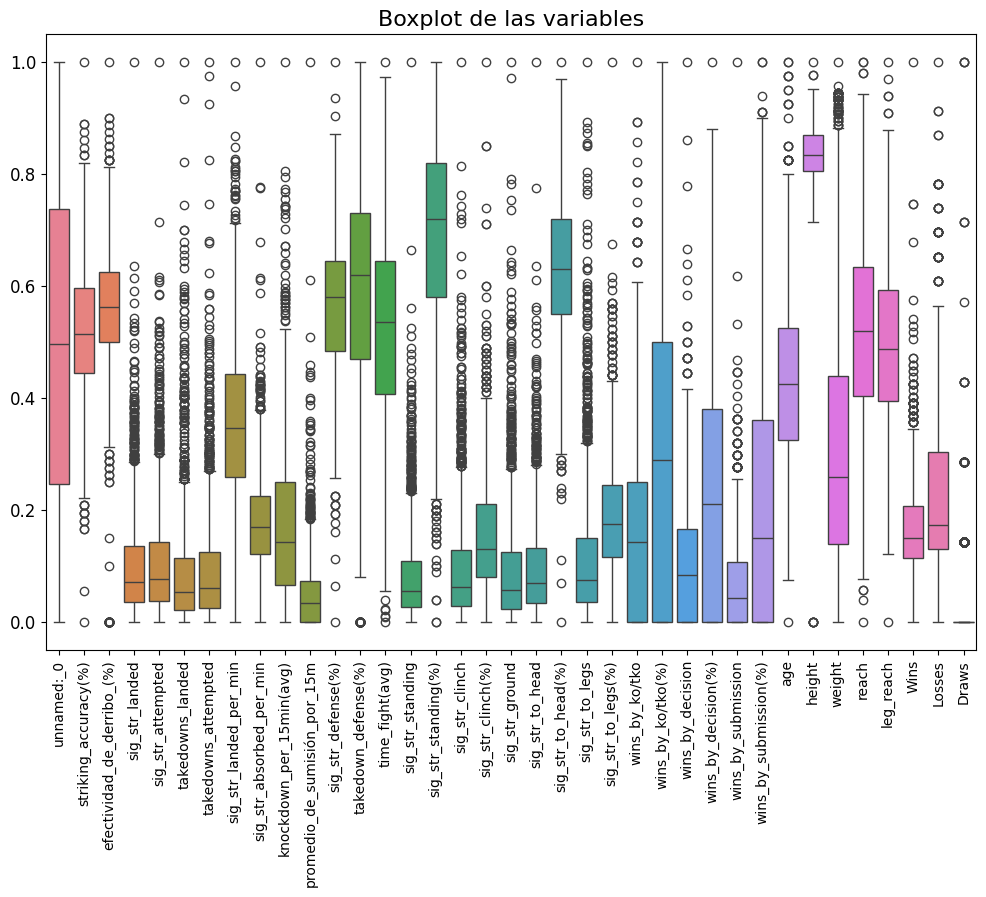

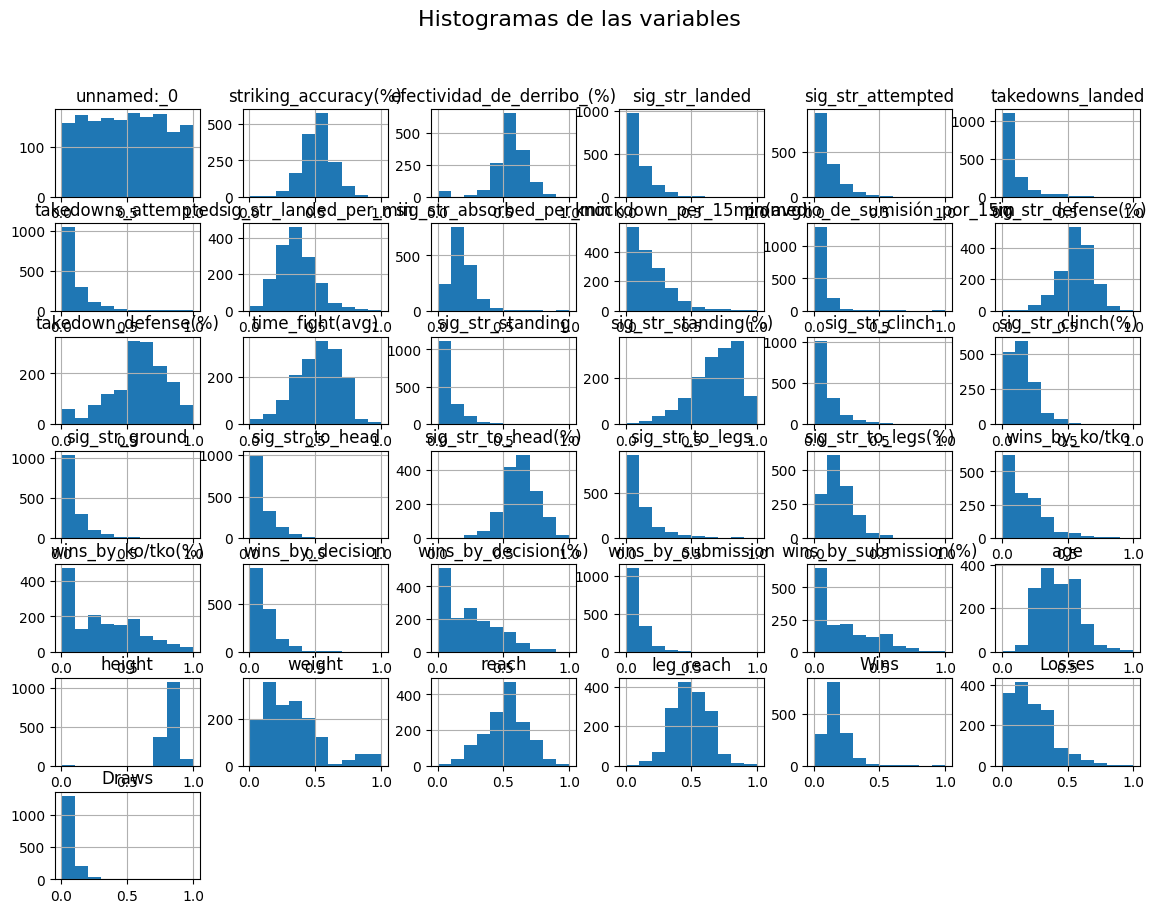

In [193]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Aumentar el tamaño de los gráficos
plt.figure(figsize=(12, 8))

# Diagrama de caja (Boxplot)
sns.boxplot(data=df)
plt.title("Boxplot de las variables", fontsize=16)
plt.xticks(rotation=90)  # Rota los nombres de las variables a 90 grados
plt.yticks(fontsize=12)
plt.show()

# Histograma
df.hist(figsize=(14, 10))
plt.suptitle("Histogramas de las variables", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


In [194]:
#Los peleadores con altura 0 se cambia por la media de la división
df["height"] = df.groupby("division")["height"].transform(lambda x: x.replace(0, x[x > 0].mean()))

                              unnamed:_0  striking_accuracy(%)  \
unnamed:_0                      1.000000             -0.016980   
striking_accuracy(%)           -0.016980              1.000000   
efectividad_de_derribo_(%)     -0.025155              0.722621   
sig_str_landed                 -0.009950              0.084191   
sig_str_attempted              -0.015341             -0.057191   
takedowns_landed               -0.009089              0.047099   
takedowns_attempted            -0.020914              0.003760   
sig_str_landed_per_min         -0.029313              0.305562   
sig_str_absorbed_per_min       -0.011067             -0.135891   
knockdown_per_15min(avg)       -0.004536              0.152833   
promedio_de_sumisión_por_15m    0.018527             -0.004870   
sig_str_defense(%)             -0.047297             -0.174845   
takedown_defense(%)             0.003266              0.106814   
time_fight(avg)                -0.000747             -0.084294   
sig_str_st

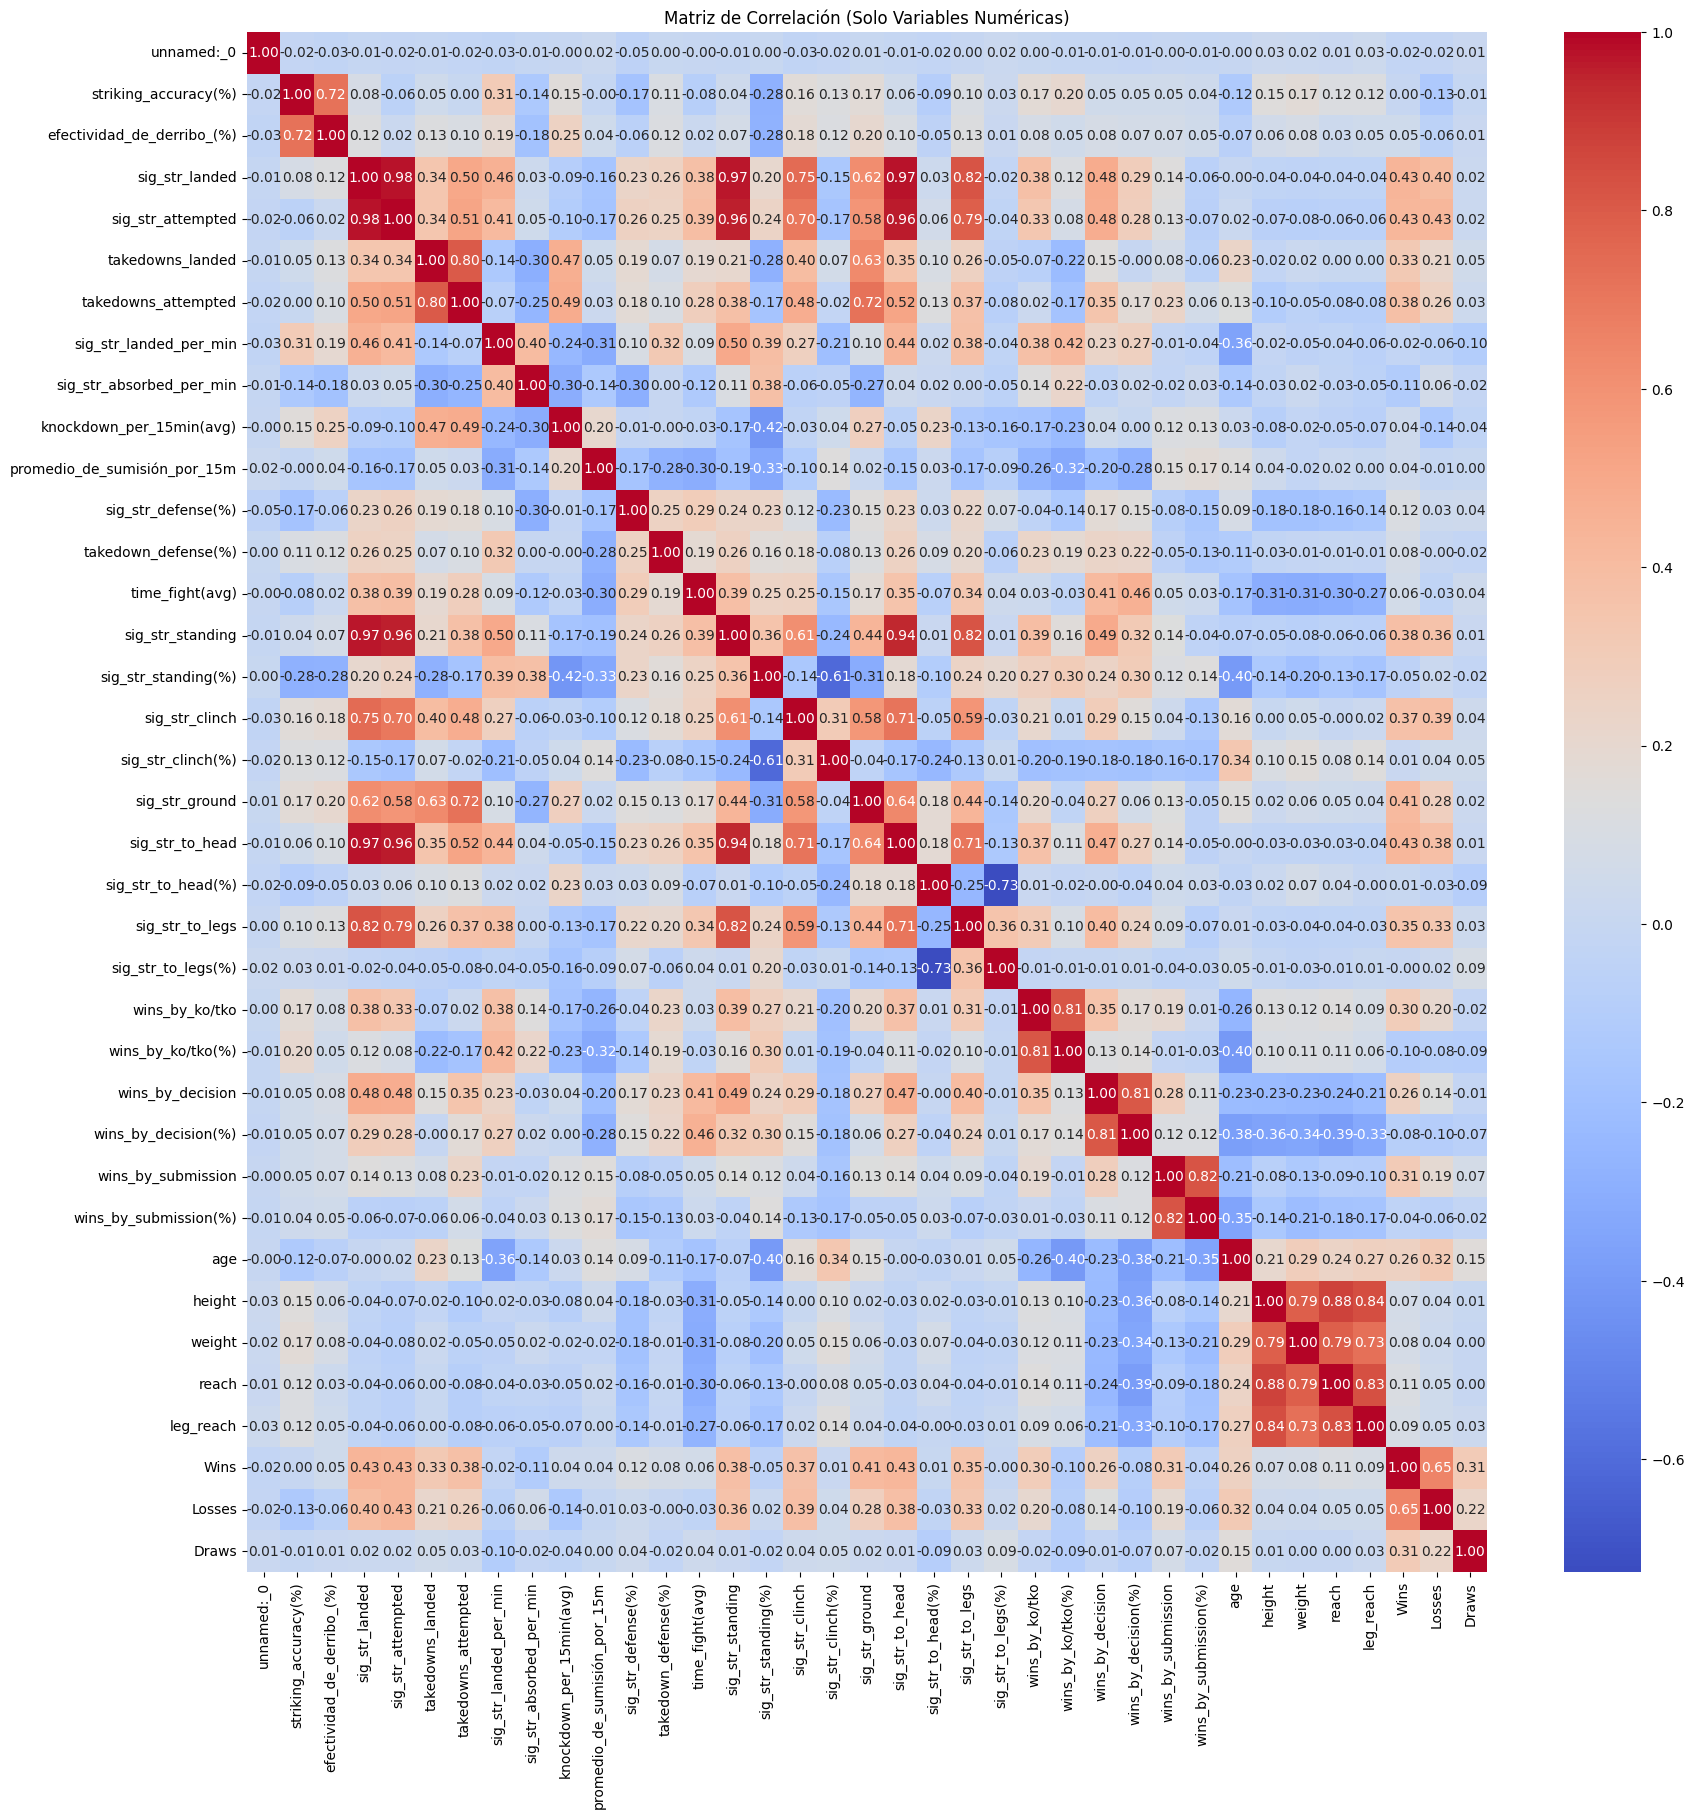

In [196]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


df_numeric = df.select_dtypes(include=[np.number])

# Calcular la matriz de correlación
corr_matrix = df_numeric.corr()

# Mostrar la matriz de correlación
print(corr_matrix)

# Visualizar con un heatmap
plt.figure(figsize=(20,20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlación (Solo Variables Numéricas)")
plt.show()
